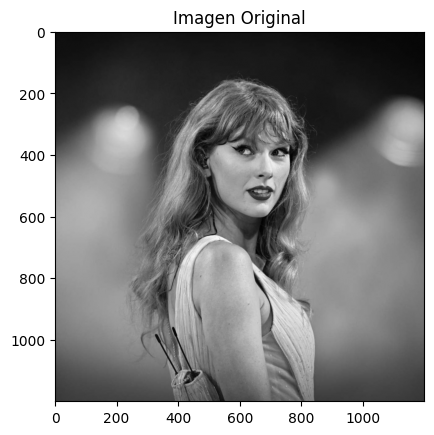

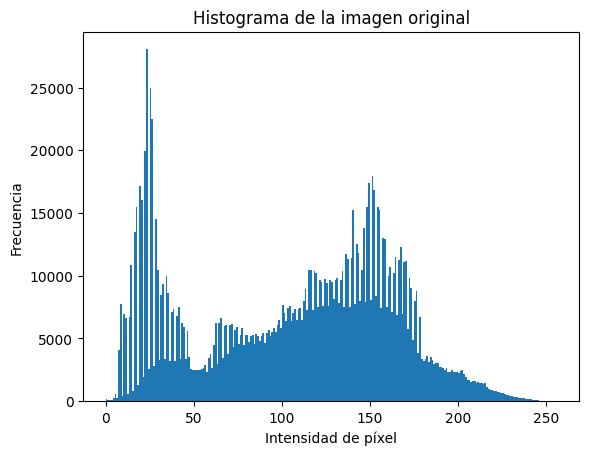

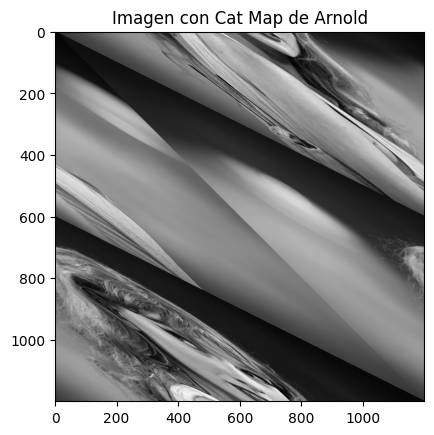

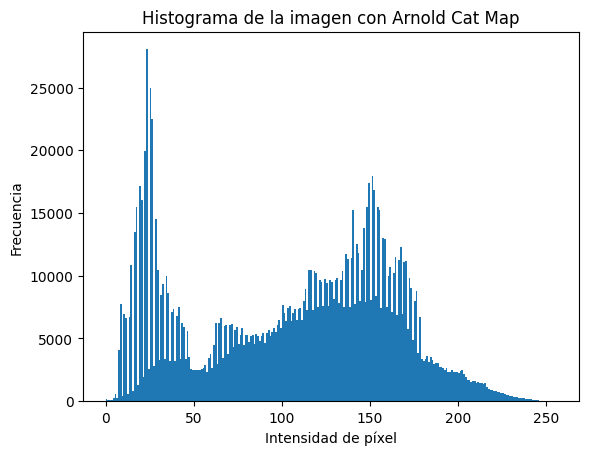

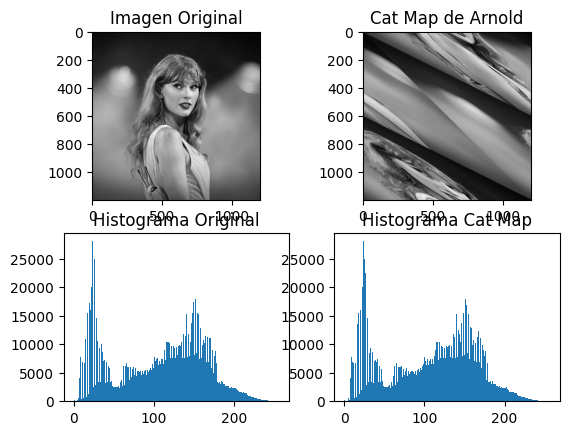

Entropía de la imagen original: 7.4795
Entropía de la imagen con Arnold Cat Map: 7.4795


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from PIL import Image
from PIL import ImageOps
from scipy.stats import entropy
img_path = r'C:\Users\adega\Downloads\img_prueba.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
 
# Verificar si la imagen fue cargada correctamente
if img is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Mostrar la imagen original
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')
    plt.show()
 
    # Función para dibujar el histograma
    def draw_hist(x_axis, input):
        figsize = (5, 5)
        fig, ax = plt.subplots(figsize=figsize)
        plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
        return fig, ax
 
    # Histograma de la imagen original
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title('Histograma de la imagen original')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.show()
 
    # Función de Arnold Cat Map
    def arnold_cat_map(image, iterations):
        h, w = image.shape
        new_image = np.copy(image)
        for _ in range(iterations):
            temp_image = np.zeros_like(image)
            for x in range(h):
                for y in range(w):
                    # Aplicando el Cat Map de Arnold: (x', y') = (x + y, x + 2y) mod N
                    new_x = (x + y) % h
                    new_y = (x + 2 * y) % w
                    temp_image[new_x, new_y] = image[x, y]
            new_image = np.copy(temp_image)
        return new_image
 
    # Aplicar el Cat Map de Arnold
    ACMimg = arnold_cat_map(img, 10)
 
    # Mostrar la imagen transformada
    plt.imshow(ACMimg, cmap='gray')
    plt.title('Imagen con Cat Map de Arnold')
    plt.show()
 
    # Histograma de la imagen transformada
    plt.hist(ACMimg.ravel(), bins=256, range=(0, 256))
    plt.title('Histograma de la imagen con Arnold Cat Map')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.show()
 
    # Mostrar ambas imágenes y sus histogramas
    plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Imagen Original')
    plt.subplot(222), plt.imshow(ACMimg, cmap='gray'), plt.title('Cat Map de Arnold')
    plt.subplot(223), plt.hist(img.ravel(), bins=256, range=(0, 256)), plt.title('Histograma Original')
    plt.subplot(224), plt.hist(ACMimg.ravel(), bins=256, range=(0, 256)), plt.title('Histograma Cat Map')
    plt.show()
 
    # Calcular la entropía de ambas imágenes
    pixel_probOrg = cv2.calcHist([img], [0], None, [256], [0, 256]) / img.size
    pixel_probACM = cv2.calcHist([ACMimg], [0], None, [256], [0, 256]) / ACMimg.size
 
    entropy_valOrg = entropy(pixel_probOrg.flatten(), base=2)
    entropy_valACM = entropy(pixel_probACM.flatten(), base=2)
 
    # Imprimir las entropías
    print(f"Entropía de la imagen original: {entropy_valOrg:.4f}")
    print(f"Entropía de la imagen con Arnold Cat Map: {entropy_valACM:.4f}")